EMOTION AND SENTIMENT ANALYSIS WITH MACHINE LEARNING

Data Bersumber dari kaggle dengan link https://www.kaggle.com/datasets/jocelyndumlao/prdect-id-indonesian-emotion-classification

# Import Data from Kaggle

In [ ]:
from google.colab import files
uploaded = files.upload() #upload kaggle key

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle  # Membuat direktori .kaggle
!mv kaggle.json ~/.kaggle/  # Memindahkan kaggle.json ke direktori tersebut
!chmod 600 ~/.kaggle/kaggle.json  # Mengatur izin akses agar aman
datasetname = 'jocelyndumlao'
datasetid = 'prdect-id-indonesian-emotion-classification'
!kaggle datasets download -d jocelyndumlao/prdect-id-indonesian-emotion-classification --unzip --force

Dataset URL: https://www.kaggle.com/datasets/jocelyndumlao/prdect-id-indonesian-emotion-classification
License(s): CC0-1.0
100% 306k/306k [00:00<00:00, 895kB/s]
100% 306k/306k [00:00<00:00, 893kB/s]


In [ ]:
!ls

 preprocessed_data.xlsx
'Product Reviews Dataset for Emotions Classification Tasks - Indonesian (PRDECT-ID) Dataset'
 sample_data


In [ ]:
import os
#print(os.listdir()) # Lihat isi direktori
print(os.listdir("Product Reviews Dataset for Emotions Classification Tasks - Indonesian (PRDECT-ID) Dataset"))

['PRDECT-ID Dataset.csv']


In [ ]:
import pandas as pd
df = pd.read_csv("Product Reviews Dataset for Emotions Classification Tasks - Indonesian (PRDECT-ID) Dataset/PRDECT-ID Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [ ]:
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


# Data Preprocessing

In [ ]:
df.isnull().sum()

,0
Category,0
Product Name,0
Location,0
Price,0
Overall Rating,0
Number Sold,0
Total Review,0
Customer Rating,0
Customer Review,0
Sentiment,0


In [ ]:
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
pip install sastrawi swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 17.5 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=25de4eee2ba5a3d1302331dca59aaaef771ef5a0d534ff07171248887bd42e0a
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


## Text Preprocessing

In [ ]:
normalization_dict = {
    "sy": "saya",
    "bgt": "sangat",
    "gk": "tidak",
    "ga":"tidak",
    "gak": "tidak",
    "kalo": "kalau",
    "tp": "tapi",
    "tdk": "tidak",
    "blm": "belum",
    "aja": "saja",
    "yg": "yang",
    "tuh": "itu",
    "ttg": "tentang",
    "klo": "kalau",
    "ga": "gak",
    'udah':'sudah',
    'gt':'begitu',
    'lg':'lagi',
    'jgn':'jangan'
    }

In [ ]:
import re
import nltk
import swifter
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Downloading necessary NLTK packages
nltk.download('punkt_tab')
#nltk.download('stopwords')
#stop_words = set(stopwords.words('indonesian'))
factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())
# Hapus kata-kata yang ingin dipertahankan dari stopwords
words_to_keep = {'top', 'baik','lama'}  # Gantilah dengan kata-kata yang ingin Anda pertahankan
stop_words.update(['jadi','nya','lah'])
stop_words.difference_update(words_to_keep)  # Menghapus kata-kata yang ingin dipertahankan dari stopwords
# Initialize stemmer once
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
  # Convert to lowercase
  text = text.lower()

  # Remove special characters, punctuation, and numbers
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
  text = re.sub(r'@\w+', '', text)  # Remove mentions
  text = re.sub(r'#\w+', '', text)  # Remove hashtags
  text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
  text = re.sub(r'\d+', '', text) # remove number
  text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

  # Tokenization
  tokens = nltk.word_tokenize(text)

  # Normalisasi
  normalized_words = [normalization_dict.get(token, token) for token in tokens]

  # Stop word removal
  filtered_tokens = [word for word in  normalized_words if word not in stop_words]
  preprocessed_text = ' '.join(filtered_tokens)

  # Stemming
  preprocessed_text = stemmer.stem(preprocessed_text)

  return preprocessed_text

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
stop_words

{'ada',
 'adalah',
 'agak',
 'agar',
 'akan',
 'amat',
 'anda',
 'antara',
 'anu',
 'apakah',
 'apalagi',
 'atau',
 'bagaimanapun',
 'bagi',
 'bahwa',
 'begitu',
 'belum',
 'bisa',
 'boleh',
 'dahulu',
 'dalam',
 'dan',
 'dapat',
 'dari',
 'daripada',
 'demi',
 'demikian',
 'dengan',
 'di',
 'dia',
 'dimana',
 'dll',
 'dsb',
 'dst',
 'dua',
 'dulunya',
 'guna',
 'hal',
 'hanya',
 'harus',
 'ia',
 'ingin',
 'ini',
 'itu',
 'itulah',
 'jadi',
 'jika',
 'juga',
 'kah',
 'kami',
 'karena',
 'ke',
 'kecuali',
 'kemana',
 'kembali',
 'kenapa',
 'kepada',
 'ketika',
 'kita',
 'lagi',
 'lain',
 'maka',
 'mari',
 'masih',
 'melainkan',
 'mengapa',
 'menurut',
 'mereka',
 'namun',
 'nanti',
 'nggak',
 'oh',
 'ok',
 'oleh',
 'pada',
 'para',
 'pasti',
 'pula',
 'pun',
 'saat',
 'saja',
 'sambil',
 'sampai',
 'saya',
 'sebab',
 'sebagai',
 'sebelum',
 'sebetulnya',
 'secara',
 'sedangkan',
 'seharusnya',
 'sehingga',
 'sekitar',
 'selagi',
 'selain',
 'sementara',
 'seolah',
 'seperti',
 'seraya',

In [ ]:
df['Customer Review Preprocessed' ]= df['Customer Review'].swifter.apply(preprocess_text)

Pandas Apply:   0%|          | 0/5393 [00:00<?, ?it/s]

In [ ]:
# Save the DataFrame to an Excel file
df.to_excel('preprocessed_data.xlsx', index=False)

# Download the Excel file
#from google.colab import files
#files.download('preprocessed_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

In [ ]:
import pandas as pd
df = pd.read_excel('preprocessed_data.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Category                      5393 non-null   object 
 1   Product Name                  5393 non-null   object 
 2   Location                      5393 non-null   object 
 3   Price                         5393 non-null   int64  
 4   Overall Rating                5393 non-null   float64
 5   Number Sold                   5393 non-null   int64  
 6   Total Review                  5393 non-null   int64  
 7   Customer Rating               5393 non-null   int64  
 8   Customer Review               5393 non-null   object 
 9   Sentiment                     5393 non-null   object 
 10  Emotion                       5393 non-null   object 
 11  Customer Review Preprocessed  5393 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 505.7+ KB


In [ ]:
df.columns

Index(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating', 'Customer Review',
       'Sentiment', 'Emotion', 'Customer Review Preprocessed'],
      dtype='object')

In [ ]:
df[['Price', 'Overall Rating','Number Sold', 'Total Review', 'Customer Rating']].describe()

,Price,Overall Rating,Number Sold,Total Review,Customer Rating
count,5.393000e+03,5393.000000,5393.000000,5393.000000,5393.000000
mean,2.388814e+05,4.854348,15968.273688,2166.188763,3.087521
std,8.021253e+05,0.108281,74248.731905,2913.132692,1.765914
min,1.000000e+02,4.100000,9.000000,4.000000,1.000000
25%,2.000000e+04,4.800000,1613.000000,576.000000,1.000000
50%,5.990000e+04,4.900000,3789.000000,1191.000000,3.000000
75%,1.500000e+05,4.900000,9707.000000,2582.000000,5.000000
max,1.539900e+07,5.000000,1000000.000000,24500.000000,5.000000


In [ ]:
# melihat statistika deskriptif dari variabel kategorik
df[['Category', 'Product Name', 'Location','Sentiment', 'Emotion']].describe()

,Category,Product Name,Location,Sentiment,Emotion
count,5393,5393,5393,5393,5393
unique,29,1308,61,2,5
top,Books,Minigold Black Series Logam Mulia Koin Emas Mi...,Jakarta Barat,Negative,Happy
freq,200,25,1290,2817,1768


In [ ]:
import numpy as np
pivot_table = pd.pivot_table(
    df,
    index=['Product Name', 'Sentiment'],
    aggfunc={'Number Sold': 'count', 'Price': np.mean,'Customer Rating':np.mean}
).unstack()

# Menghitung selisih harga antara sentimen positif dan negatif
pivot_table['Price_Difference'] = (
    pivot_table['Price']['Positive'] - pivot_table['Price']['Negative']
)

# Mengurutkan berdasarkan Price_Difference
pivot_table.sort_values(by='Price_Difference', ascending=False)

Customer Rating           \
Sentiment                                                 Negative Positive   
Product Name                                                                  
FULL SET BAKO BERKUALITAS AA, ALAT SLOROK BIRU ...        1.000000      5.0   
Senter Kepala COB LED Rechargeable / HEADLAMP S...        1.000000      5.0   
Kertas HVS A4 | 75 Grm | PaperOne                         1.000000      5.0   
10 Pcs Pisang Goreng Madu Bu Nanik (RESMI)                1.000000      5.0   
Pisang Cavendish Finger 1 kg                              2.333333      5.0   
...                                                            ...      ...   
spidol ban original toyo paint marker murah - H...        1.000000      NaN   
stik PS2/stick ps2/merkBE/STIKPS                          1.500000      NaN   
tas selempang wanita shouder bag waterproof imp...        2.000000      NaN   
tawas cair deodorant spray penghilang bau badan...        1.000000      NaN   
terpal A12 korea ( IMPORT)                                1.000000      NaN   

                                                   Number Sold           \
Sentiment                                             Negative Positive   
Product Name                                                              
FULL SET BAKO BERKUALITAS AA, ALAT SLOROK BIRU ...         1.0     15.0   
Senter Kepala COB LED Rechargeable / HEADLAMP S...        10.0      3.0   
Kertas HVS A4 | 75 Grm | PaperOne                         12.0      2.0   
10 Pcs Pisang Goreng Madu Bu Nanik (RESMI)                 1.0      3.0   
Pisang Cavendish Finger 1 kg                               3.0      3.0   
...                                                        ...      ...   
spidol ban original toyo paint marker murah - H...         3.0      NaN   
stik PS2/stick ps2/merkBE/STIKPS                           2.0      NaN   
tas selempang wanita shouder bag waterproof imp...         2.0      NaN   
tawas cair deodorant spray penghilang bau badan...         1.0      NaN   
terpal A12 korea ( IMPORT)                                 5.0      NaN   

                                                      Price           \
Sentiment                                          Negative Positive   
Product Name                                                           
FULL SET BAKO BERKUALITAS AA, ALAT SLOROK BIRU ...  41450.0  41670.0   
Senter Kepala COB LED Rechargeable / HEADLAMP S...  19441.5  19500.0   
Kertas HVS A4 | 75 Grm | PaperOne                   37250.0  37300.0   
10 Pcs Pisang Goreng Madu Bu Nanik (RESMI)          70000.0  70000.0   
Pisang Cavendish Finger 1 kg                        11000.0  11000.0   
...                                                     ...      ...   
spidol ban original toyo paint marker murah - H...   3500.0      NaN   
stik PS2/stick ps2/merkBE/STIKPS                    30000.0      NaN   
tas selempang wanita shouder bag waterproof imp...  59000.0      NaN   
tawas cair deodorant spray penghilang bau badan...  16000.0      NaN   
terpal A12 korea ( IMPORT)                          10000.0      NaN   

                                                   Price_Difference  
Sentiment                                                            
Product Name                                                         
FULL SET BAKO BERKUALITAS AA, ALAT SLOROK BIRU ...            220.0  
Senter Kepala COB LED Rechargeable / HEADLAMP S...             58.5  
Kertas HVS A4 | 75 Grm | PaperOne                              50.0  
10 Pcs Pisang Goreng Madu Bu Nanik (RESMI)                      0.0  
Pisang Cavendish Finger 1 kg                                    0.0  
...                                                             ...  
spidol ban original toyo paint marker murah - H...              NaN  
stik PS2/stick ps2/merkBE/STIKPS                                NaN  
tas selempang wanita shouder bag waterproof imp...              NaN  
tawas cair deodorant spray penghilang bau ba

In [ ]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df,index=['Category','Sentiment','Emotion'],aggfunc={'Number Sold':'count','Overall Rating':np.mean}).sort_values(by='Overall Rating', ascending=True)

Number Sold  Overall Rating
Category                 Sentiment Emotion                             
Camera                   Negative  Anger             12        4.575000
Property                 Positive  Love              20        4.680000
Kids and Baby Fashion    Negative  Anger             13        4.707692
                                   Sadness           57        4.731579
Gaming                   Negative  Sadness           41        4.748780
Toys and Hobbies         Negative  Sadness           40        4.750000
Movies and Music         Negative  Anger             11        4.754545
Kids and Baby Fashion    Negative  Fear              30        4.756667
Gaming                   Negative  Fear              54        4.757407
Camera                   Negative  Sadness           57        4.761404
Kids and Baby Fashion    Positive  Happy             76        4.763158
Carpentry                Negative  Anger             40        4.767500
Toys and Hobbies         Negative  Fear              40        4.767500
Movies and Music         Negative  Sadness           25        4.768000
Sport                    Negative  Anger             40        4.770000
Movies and Music         Negative  Fear              64        4.773438
Women's Fashion          Negative  Anger             12        4.775000
Toys and Hobbies         Negative  Anger             39        4.776923
Men's Fashion            Negative  Fear              22        4.777273
Other Products           Positive  Happy             40        4.785000
Men's Fashion            Negative  Sadness           61        4.785246
Movies and Music         Positive  Happy             93        4.786022
Phones and Tablets       Positive  Love               8        4.787500
Camera                   Negative  Fear              32        4.787500
Other Products           Negative  Anger             40        4.790000
Muslim Fashion           Negative  Fear              22        4.790909
                                   Anger             14        4.792857
Household                Negative  Sadness           41        4.804878
Computers and Laptops    Negative  Fear              40        4.807500
Household                Negative  Fear              38        4.807895
Camera                   Positive  Love              12        4.808333
Kids and Baby Fashion    Positive  Love              24        4.808333
Other Products           Negative  Fear              40        4.810000
Men's Fashion            Negative  Anger             17        4.811765
Carpentry                Negative  Fear              40        4.812500
                         Positive  Happy             40        4.812500
Phones and Tablets       Negative  Sadness           50        4.814000
Carpentry                Negative  Sadness           40        4.815000
Women's Fashion          Positive  Love              12        4.816667
                         Negative  Fear              25        4.820000
Gaming                   Negative  Anger              5        4.820000
Other Products           Negative  Sadness           40        4.820000
Phones and Tablets       Negative  Fear              44        4.820455
Automotive               Positive  Happy             39        4.820513
Women's Fashion          Positive  Happy             88        4.822727
Muslim Fashion           Positive  Love              30        4.823333
Men's Fashion            Positive  Love              19        4.826316
Automotive               Negative  Fear              40        4.827500
Electronics              Negative  Anger             18        4.827778
                                   Sadness           54        4.829630
Party Supplies and Craft Negative  Sadness           40        4.830000
Automotive               Negative  Anger             40        4.830000
Party Supplies and Craft Negative  Anger             40        4.832500
Muslim Fashion           Positive  Happy             70        4.832857
Women's Fash

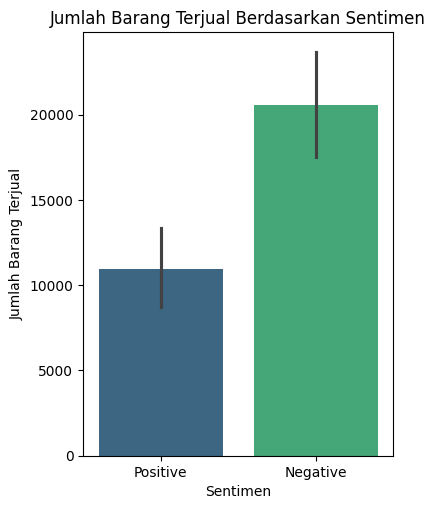

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 5.5))
sns.barplot(x='Sentiment', y='Number Sold', data=df,palette='viridis')
plt.title('Jumlah Barang Terjual Berdasarkan Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Barang Terjual')
plt.show()

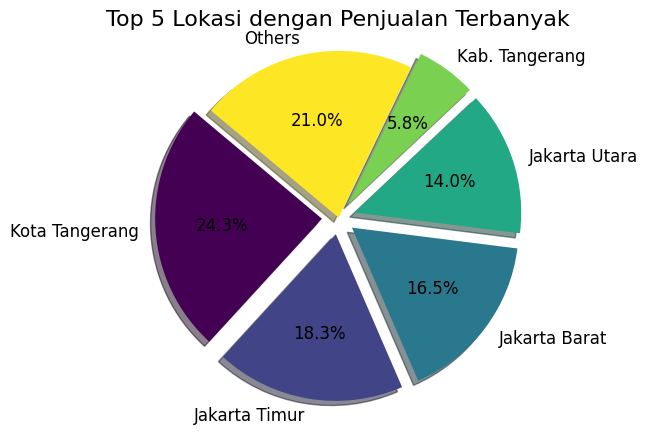

In [ ]:
df_grouped = df.groupby('Location')['Number Sold'].sum().reset_index()

# Mengurutkan lokasi berdasarkan jumlah penjualan secara menurun
df_sorted = df_grouped.sort_values(by='Number Sold', ascending=False)

# Mengambil 5 lokasi teratas
top_5_locations = df_sorted.head(5)

# Menggabungkan penjualan dari lokasi lainnya
others_sum = df_sorted['Number Sold'][5:].sum()  # Menjumlahkan sisa lokasi

# Menggabungkan data top 5 lokasi dengan kategori "Others"
top_5_locations = pd.concat([
    top_5_locations,
    pd.DataFrame({'Location': ['Others'], 'Number Sold': [others_sum]})
], ignore_index=True)

# Membuat pie chart
plt.figure(figsize=(5, 5))  # Increased figure size
colors = plt.cm.viridis(np.linspace(0, 1, len(top_5_locations)))  # Viridis colormap
explode = [0.1 if i < 5 else 0 for i in range(len(top_5_locations))]  # Explode top 5 slices

plt.pie(
    top_5_locations['Number Sold'],
    labels=top_5_locations['Location'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,  # Added shadow for depth
    textprops={'fontsize': 12}  # Increased font size
)

plt.title('Top 5 Lokasi dengan Penjualan Terbanyak', fontsize=16)  # Increased title font size
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.7 MB/s eta 0:00:00


In [ ]:
import pingouin as pg
# Menjalankan ANOVA untuk setiap variabel kategorikal
for factor in ['Category', 'Product Name', 'Location','Sentiment', 'Emotion']:
    anova_result = pg.anova(dv='Number Sold', between=factor, data=df)
    print(f'ANOVA result for {factor}:')
    print(anova_result)

ANOVA result for Category:
     Source  ddof1  ddof2          F          p-unc       np2
0  Category     28   5364  38.016367  6.233839e-187  0.165585
ANOVA result for Product Name:
         Source  ddof1  ddof2              F  p-unc      np2
0  Product Name   1307   4085  105679.081257    0.0  0.99997
ANOVA result for Location:
     Source  ddof1  ddof2         F         p-unc       np2
0  Location     60   5332  2.945728  3.703945e-13  0.032084
ANOVA result for Sentiment:
      Source  ddof1  ddof2         F     p-unc       np2
0  Sentiment      1   5391  22.74227  0.000002  0.004201
ANOVA result for Emotion:
    Source  ddof1  ddof2         F     p-unc       np2
0  Emotion      4   5388  7.360325  0.000007  0.005435


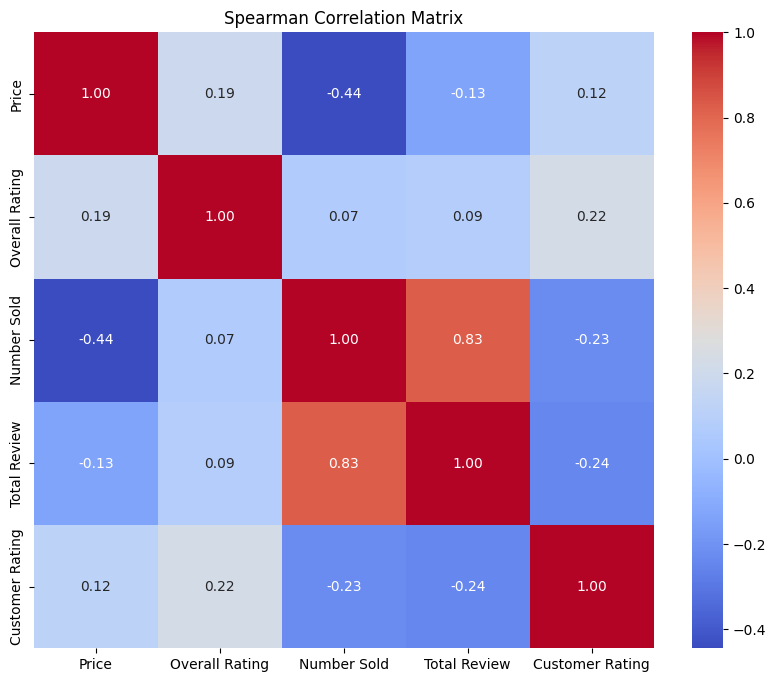

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['Price', 'Overall Rating','Number Sold', 'Total Review', 'Customer Rating']].corr(method='spearman')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

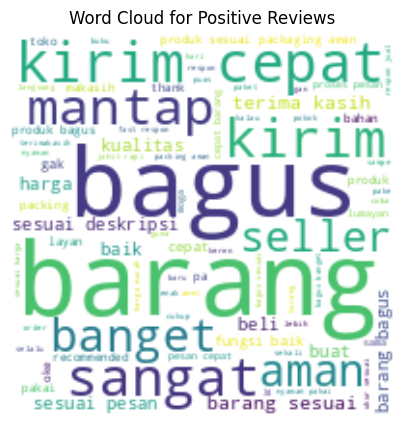

In [ ]:
# for sentiment positive

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter and Combine all the positive tweets into a single string
text = " ".join(df[df['Sentiment']=='Positive']['Customer Review Preprocessed'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=200, height=200, background_color='white', colormap='viridis').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Reviews")
plt.axis("off")
plt.show()

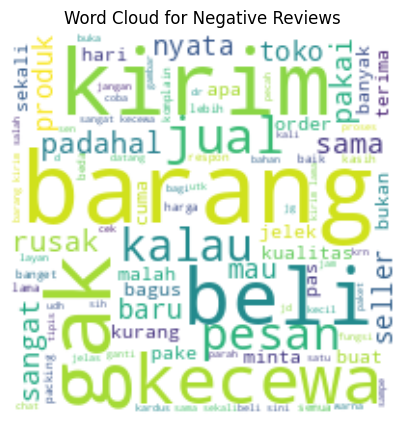

In [ ]:
# for sentiment positive

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter and Combine all the positive tweets into a single string
text = " ".join(df[df['Sentiment']=='Negative']['Customer Review Preprocessed'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=200, height=200, background_color='white', colormap='viridis').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Negative Reviews")
plt.axis("off")
plt.show()

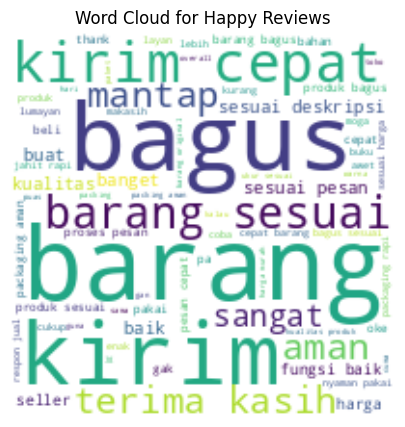

In [ ]:
# for sentiment positive

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df[df['Emotion']=='Happy']['Customer Review Preprocessed'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=200, height=200, background_color='white', colormap='viridis').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Happy Reviews")
plt.axis("off")
plt.show()

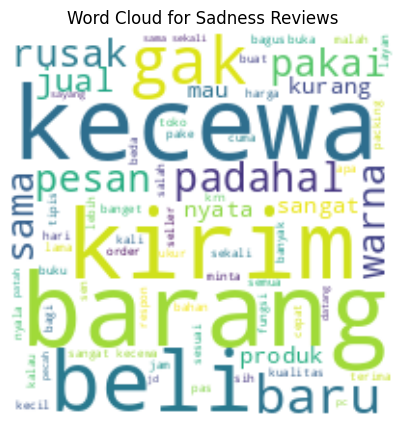

In [ ]:
# for sentiment positive

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df[df['Emotion']=='Sadness']['Customer Review Preprocessed'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=200, height=200, background_color='white', colormap='viridis').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Sadness Reviews")
plt.axis("off")
plt.show()

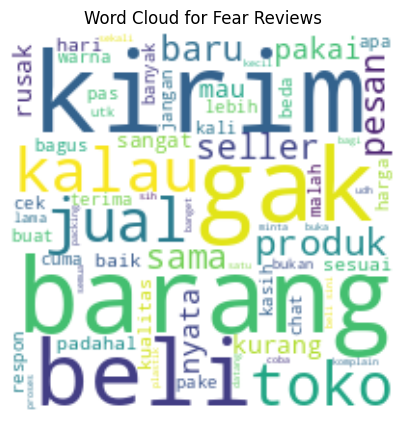

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter and Combine all the positive tweets into a single string
text = " ".join(df[df['Emotion']=='Fear']['Customer Review Preprocessed'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=200, height=200, background_color='white', colormap='viridis').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Fear Reviews")
plt.axis("off")
plt.show()

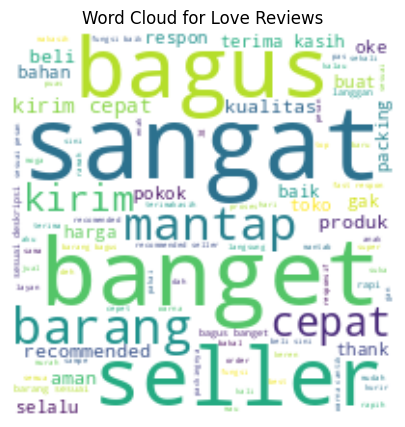

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df[df['Emotion']=='Love']['Customer Review Preprocessed'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=200, height=200, background_color='white', colormap='viridis').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Love Reviews")
plt.axis("off")
plt.show()

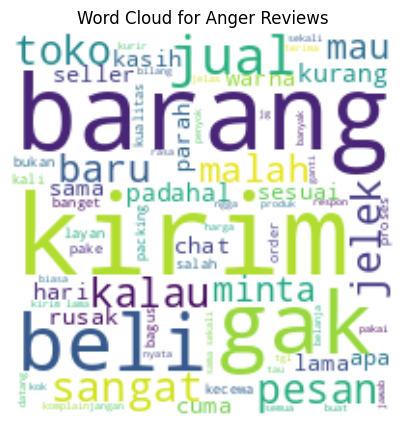

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df[df['Emotion']=='Anger']['Customer Review Preprocessed'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=200, height=200, background_color='white', colormap='viridis').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Anger Reviews")
plt.axis("off")
plt.show()

In [ ]:
df['Emotion'].value_counts()

,count
Emotion,
Happy,1768
Sadness,1201
Fear,918
Love,808
Anger,698


# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Customer Review Preprocessed'])

In [ ]:
# Mendapatkan nama-nama kata yang ada dalam seluruh corpus
words = vectorizer.get_feature_names_out()

# Mengubah matriks TF-IDF menjadi DataFrame untuk memudahkan analisis
df_tfidf = pd.DataFrame(X.toarray(), columns=words)

# Menampilkan TF-IDF Matrix
print("TF-IDF Matrix:")
print(df_tfidf)

# Menampilkan kata-kata dengan nilai TF-IDF tertinggi di setiap dokumen
for i in range(len(df)):
    print(f"\nDokumen {i+1}:")
    sorted_words = df_tfidf.iloc[i].sort_values(ascending=False)
    top_words = sorted_words.head(3)  # Menampilkan 3 kata teratas
    for word, score in top_words.items():
        print(f"{word}: {score}")

Streaming output truncated to the last 5000 lines.

Dokumen 4394:
leather: 0.5541471530904711
berapa: 0.4425842219721596
full: 0.43760040621113383

Dokumen 4395:
status: 0.3821280116300257
laku: 0.3821280116300257
kembali: 0.35193673407328413

Dokumen 4396:
kemeja: 0.447034746871024
saku: 0.4348797593845564
kiri: 0.3682187469107168

Dokumen 4397:
dipake: 0.31303415172742427
jahit: 0.2870039547007939
pundak: 0.24536039312686517

Dokumen 4398:
putih: 0.4168938705883363
maron: 0.3242235750299009
ee: 0.3242235750299009

Dokumen 4399:
itu: 0.46780869892414245
item: 0.41708493357930393
sobek: 0.36436047955601725

Dokumen 4400:
please: 0.6391170166715004
hitam: 0.4173379185977067
warna: 0.30660574073945435

Dokumen 4401:
kancing: 0.471147530230388
sorry: 0.44300075700208585
celana: 0.39236007723139604

Dokumen 4402:
kancing: 0.5789472313758595
celana: 0.48213301745306286
dapet: 0.44164199540130483

Dokumen 4403:
beli: 0.47032596982304975
besar: 0.4145715478038109
komplaintapi: 0.3280995057713

In [ ]:
# Mendapatkan nama-nama kata yang ada dalam seluruh corpus
words = vectorizer.get_feature_names_out()

# Mengubah matriks TF-IDF menjadi DataFrame untuk memudahkan analisis
df_tfidf = pd.DataFrame(X.toarray(), columns=words)

# Menghitung rata-rata nilai TF-IDF untuk setiap kata di seluruh dokumen
mean_tfidf = df_tfidf.mean(axis=0)

# Mengurutkan kata berdasarkan nilai rata-rata TF-IDF secara menurun
top_words_all = mean_tfidf.sort_values(ascending=False).head(10)

# Menampilkan kata-kata dengan nilai TF-IDF tertinggi di seluruh corpus
print("\nKata-kata dengan nilai TF-IDF tertinggi di seluruh corpus:")
print(top_words_all)


Kata-kata dengan nilai TF-IDF tertinggi di seluruh corpus:
barang    0.048091
sesuai    0.040469
kirim     0.037781
bagus     0.032759
cepat     0.029489
produk    0.021697
sangat    0.021686
pesan     0.021421
baik      0.019022
banget    0.018875
dtype: float64


# Data Modeling


In [ ]:
from sklearn.model_selection import train_test_split
y_1 = df['Sentiment']
y_2 = df['Emotion']
# Splitting data
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y_1, y_2, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=42)
X1_train, y1_train= smote.fit_resample(X_train, y1_train)
X2_train, y2_train= smote.fit_resample(X_train, y2_train)

In [ ]:
from sklearn.svm import SVC
model1_svc = SVC(C= 10, gamma= 1, kernel= 'rbf',class_weight='balanced')
model1_svc.fit(X1_train, y1_train)

model2_svc = SVC(C= 10, gamma= 1, kernel= 'rbf',class_weight='balanced')
model2_svc.fit(X2_train, y2_train)

SVC(C=10, class_weight='balanced', gamma=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1_nb = MultinomialNB(alpha= 0.1, fit_prior= False)
model1_nb.fit(X1_train, y1_train)

model2_nb = MultinomialNB(alpha= 0.1, fit_prior= False)
model2_nb.fit(X2_train, y2_train)

MultinomialNB(alpha=0.1, fit_prior=False)

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
y1_pred = model1_nb.predict(X_test)
y2_pred = model2_nb.predict(X_test)

print("Classification Report Sentiment:")
print(classification_report(y1_test, y1_pred))

print("Accuracy Score Sentiment:", accuracy_score(y1_test, y1_pred))

print("Classification Report Emotion:")
print(classification_report(y2_test, y2_pred))

print("Accuracy Score Emotion:", accuracy_score(y2_test, y2_pred))

Classification Report Sentiment:
              precision    recall  f1-score   support

    Negative       0.93      0.89      0.91       562
    Positive       0.88      0.93      0.90       517

    accuracy                           0.91      1079
   macro avg       0.91      0.91      0.91      1079
weighted avg       0.91      0.91      0.91      1079

Accuracy Score Sentiment: 0.9063948100092678
Classification Report Emotion:
              precision    recall  f1-score   support

       Anger       0.38      0.43      0.40       152
        Fear       0.36      0.36      0.36       174
       Happy       0.72      0.74      0.73       349
        Love       0.56      0.56      0.56       168
     Sadness       0.49      0.42      0.45       236

    accuracy                           0.54      1079
   macro avg       0.50      0.50      0.50      1079
weighted avg       0.54      0.54      0.54      1079

Accuracy Score Emotion: 0.5375347544022243


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
y1_pred = model1_svc.predict(X_test)
y2_pred = model2_svc.predict(X_test)

print("Classification Report Sentiment:")
print(classification_report(y1_test, y1_pred))

print("Accuracy Score Sentiment:", accuracy_score(y1_test, y1_pred))

print("Classification Report Emotion:")
print(classification_report(y2_test, y2_pred))

print("Accuracy Score Emotion:", accuracy_score(y2_test, y2_pred))

Classification Report Sentiment:
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93       562
    Positive       0.94      0.90      0.92       517

    accuracy                           0.93      1079
   macro avg       0.93      0.92      0.93      1079
weighted avg       0.93      0.93      0.93      1079

Accuracy Score Sentiment: 0.9258572752548656
Classification Report Emotion:
              precision    recall  f1-score   support

       Anger       0.50      0.34      0.41       152
        Fear       0.41      0.43      0.42       174
       Happy       0.72      0.87      0.79       349
        Love       0.76      0.48      0.59       168
     Sadness       0.54      0.61      0.57       236

    accuracy                           0.61      1079
   macro avg       0.59      0.55      0.55      1079
weighted avg       0.61      0.61      0.60      1079

Accuracy Score Emotion: 0.6061167747914736


Text(70.72222222222221, 0.5, 'Actual')

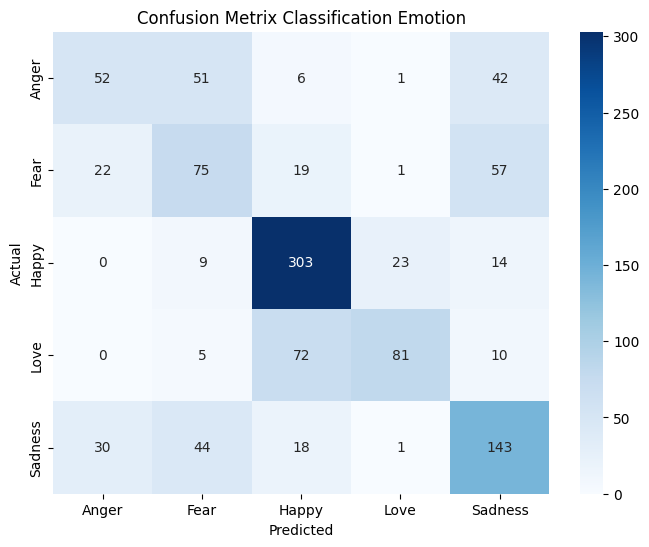

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model2_svc.classes_, yticklabels=model2_svc.classes_)
plt.title('Confusion Metrix Classification Emotion')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(20.72222222222222, 0.5, 'Actual')

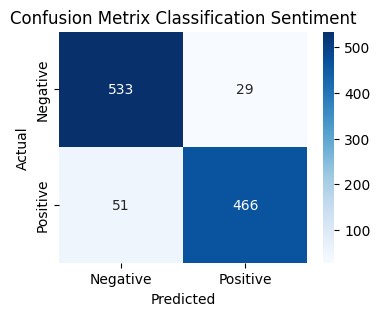

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model1_svc.classes_, yticklabels=model1_svc.classes_)
plt.title('Confusion Metrix Classification Sentiment')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Tuning Model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 'scale','auto'],
              'kernel': ['linear', 'poly', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5,scoring='accuracy')
grid_search.fit(X2_train, y2_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   9.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   7.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   8.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   8.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   8.2s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  10.1s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   9.4s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  10.1s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   9.9s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   9.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  10.6s
[CV] END .......................C=0.1, gamma=0.

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid for MultinomialNB
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Laplace smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Perform GridSearchCV for Sentiment
grid_search_nb_sentiment = GridSearchCV(MultinomialNB(), param_grid_nb, refit=True, verbose=2, cv=5,scoring='accuracy') # Use param_grid_nb instead of param_grid
grid_search_nb_sentiment.fit(X2_train, y2_train)

print("Best parameters for Sentiment (Naive Bayes):", grid_search_nb_sentiment.best_params_)
print("Best cross-validation score for Sentiment (Naive Bayes):", grid_search_nb_sentiment.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.5, fi

# Save model

In [ ]:
import pickle
from google.colab import files

# Save the trained models
filename1_svc = 'model1_svc.pkl'
pickle.dump(model1_svc, open(filename1_svc, 'wb'))

filename2_svc = 'model2_svc.pkl'
pickle.dump(model2_svc, open(filename2_svc, 'wb'))

pickle.dump(vectorizer, open("vectorizer.pkl", 'wb'))

files.download('model1_svc.pkl')
files.download('model2_svc.pkl')
files.download('vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: predict dengan model yang sudah ada

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the saved model
loaded_model = pickle.load(open('model1_svc.sav', 'rb'))

# Assuming 'new_text' is the text you want to predict on
new_text = ["produk ini sangat bagus", "produk ini sangat buruk"]

# Assuming you have the same vectorizer used during training
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_text)
# Fit the vectorizer on the training data (if not already fit and saved)
# This is crucial! Use the same vectorizer used to train the model.
#vectorizer.fit()

# Transform the new text using the fitted vectorizer
new_text_vectorized = vectorizer.transform(new_text)

# Make predictions
predictions = loaded_model.predict(new_text_vectorized)

predictions

ValueError: X has 5 features, but SVC is expecting 7594 features as input.

In [ ]:
# prompt: predict dengan model yang sudah ada

import pickle
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Memuat model dan vectorizer yang sama dengan saat pelatihan
model = joblib.load("model2_svc.sav")  # model yang sudah dilatih
vectorizer = joblib.load("vectorizer.sav")  # vectorizer yang sama dengan saat pelatihan

# 2. Memproses teks input dengan vectorizer yang sudah di-fit
teks_input = ["produk ini sangat buruk"]
teks_input_vectorized = vectorizer.transform(teks_input)  # hanya transform, jangan fit

# 3. Melakukan prediksi
prediksi = model.predict(teks_input_vectorized)

# Menampilkan hasil prediksi
print(f"Hasil prediksi: {prediksi}")


Hasil prediksi: ['Sadness']


In [ ]:
import joblib

# Memuat model dan vectorizer yang sudah disimpan
model = joblib.load("model1_svc.sav")
vectorizer = joblib.load("vectorizer.sav")

# Fungsi preprocessed (contoh fungsi, sesuaikan dengan preprocessing Anda)
def preprocessed(text):
    # Lakukan langkah-langkah preprocessing sesuai kebutuhan
    # Misalnya: menghapus tanda baca, konversi ke huruf kecil, dll.
    text = text.lower()
    # Tambahkan langkah-langkah preprocessing lain di sini
    return text

# Contoh teks input
teks_input = ["Masukkan teks yang ingin diprediksi di sini"]

# 1. Preprocess teks input
teks_input_processed = [preprocessed(teks) for teks in teks_input]

# 2. Vektorisasi teks input yang sudah dipreproses
teks_input_vectorized = vectorizer.transform(teks_input_processed)

# 3. Melakukan prediksi
prediksi = model.predict(teks_input_vectorized)

# Menampilkan hasil prediksi
print(f"Hasil prediksi: {prediksi}")


Hasil prediksi: ['Positive']
